In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("AviationData.txt", delimiter="|")

In [5]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
0,20131208X92103,Accident,ERA14FA068,12/08/2013,"Jacksonville, FL",United States,30.319723,-81.514167,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,Airplane,N98BT,CESSNA,310R,No,2,Reciprocating,Part 91: General Aviation,,Personal,,3,,,,IMC,,Preliminary,12/13/2013,
1,20131206X95526,Accident,ERA14FA066,12/06/2013,"Sebring, FL",United States,27.463333,-81.366667,SEF,Sebring Regional Airport,Fatal(1),Destroyed,Helicopter,N1001N,TEXAS HELICOPTER CORP,M74L,No,1,Unknown,Part 91: General Aviation,,Positioning,,1,,,,,,Preliminary,12/13/2013,
2,20131205X60841,Accident,ANC14CA010,12/04/2013,"Soldotna, AK",United States,,,,,,,,N88342,BELLANCA,7GCBC,,,,,,,,,,,,,,Preliminary,,
3,20131204X65412,Accident,ERA14CA062,12/03/2013,"Hendersonville, NC",United States,,,,,,,,N581TC,ANDERSON ANDREAS,RANS S-6S,,,,,,,,,,,,,,Preliminary,,
4,20131202X34203,Accident,ERA14LA059,12/02/2013,"Trenton, SC",United States,33.736944,-81.818611,6J6,Edgefield County Airport,Non-Fatal,Substantial,Airplane,N355PT,MOFFITT OSCAR/ KIT PROSTAR A/C,PT2,Yes,1,,Part 91: General Aviation,,Personal,,,,1,,,,Preliminary,12/13/2013,


In [6]:
df.columns

Index(['Event Id ', ' Investigation Type ', ' Accident Number ',
       ' Event Date ', ' Location ', ' Country ', ' Latitude ', ' Longitude ',
       ' Airport Code ', ' Airport Name ', ' Injury Severity ',
       ' Aircraft Damage ', ' Aircraft Category ', ' Registration Number ',
       ' Make ', ' Model ', ' Amateur Built ', ' Number of Engines ',
       ' Engine Type ', ' FAR Description ', ' Schedule ',
       ' Purpose of Flight ', ' Air Carrier ', ' Total Fatal Injuries ',
       ' Total Serious Injuries ', ' Total Minor Injuries ',
       ' Total Uninjured ', ' Weather Condition ', ' Broad Phase of Flight ',
       ' Report Status ', ' Publication Date ', ' '],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74428 entries, 0 to 74427
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Event Id                  74428 non-null  object
 1    Investigation Type       74428 non-null  object
 2    Accident Number          74428 non-null  object
 3    Event Date               74428 non-null  object
 4    Location                 74428 non-null  object
 5    Country                  74428 non-null  object
 6    Latitude                 74428 non-null  object
 7    Longitude                74428 non-null  object
 8    Airport Code             74428 non-null  object
 9    Airport Name             74428 non-null  object
 10   Injury Severity          74428 non-null  object
 11   Aircraft Damage          74428 non-null  object
 12   Aircraft Category        74428 non-null  object
 13   Registration Number      74428 non-null  object
 14   Make                 

In [8]:
columns_drop = ['Event Id ', ' Accident Number ', ' Registration Number ', ' Publication Date ']
df.drop(columns = columns_drop, inplace = True)

In [9]:
df.replace("  ", np.NaN, inplace = True)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x).rename(columns=lambda x: x.strip())
df.head()

,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,
0,Accident,12/08/2013,"Jacksonville, FL",United States,30.319723,-81.514167,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,Airplane,CESSNA,310R,No,2,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,NaN,Preliminary,
1,Accident,12/06/2013,"Sebring, FL",United States,27.463333,-81.366667,SEF,Sebring Regional Airport,Fatal(1),Destroyed,Helicopter,TEXAS HELICOPTER CORP,M74L,No,1,Unknown,Part 91: General Aviation,NaN,Positioning,NaN,1,NaN,NaN,NaN,NaN,NaN,Preliminary,
2,Accident,12/04/2013,"Soldotna, AK",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BELLANCA,7GCBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,
3,Accident,12/03/2013,"Hendersonville, NC",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANDERSON ANDREAS,RANS S-6S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,
4,Accident,12/02/2013,"Trenton, SC",United States,33.736944,-81.818611,6J6,Edgefield County Airport,Non-Fatal,Substantial,Airplane,MOFFITT OSCAR/ KIT PROSTAR A/C,PT2,Yes,1,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,1,NaN,NaN,NaN,Preliminary,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74428 entries, 0 to 74427
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Investigation Type      74428 non-null  object
 1   Event Date              74426 non-null  object
 2   Location                74339 non-null  object
 3   Country                 73917 non-null  object
 4   Latitude                21284 non-null  object
 5   Longitude               21275 non-null  object
 6   Airport Code            41723 non-null  object
 7   Airport Name            44622 non-null  object
 8   Injury Severity         74372 non-null  object
 9   Aircraft Damage         72267 non-null  object
 10  Aircraft Category       13655 non-null  object
 11  Make                    74339 non-null  object
 12  Model                   74307 non-null  object
 13  Amateur Built           73936 non-null  object
 14  Number of Engines       71198 non-null  object
 15  En

In [11]:
#Drop Columns where more than 50% values are null

df.drop(['Latitude', 'Longitude', 'Aircraft Category', 'FAR Description', 'Schedule', 'Air Carrier'], inplace = True, axis = 1)
df.shape

(74428, 22)

In [12]:
df.head()

,Investigation Type,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,
0,Accident,12/08/2013,"Jacksonville, FL",United States,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,CESSNA,310R,No,2,Reciprocating,Personal,3,NaN,NaN,NaN,IMC,NaN,Preliminary,
1,Accident,12/06/2013,"Sebring, FL",United States,SEF,Sebring Regional Airport,Fatal(1),Destroyed,TEXAS HELICOPTER CORP,M74L,No,1,Unknown,Positioning,1,NaN,NaN,NaN,NaN,NaN,Preliminary,
2,Accident,12/04/2013,"Soldotna, AK",United States,NaN,NaN,NaN,NaN,BELLANCA,7GCBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,
3,Accident,12/03/2013,"Hendersonville, NC",United States,NaN,NaN,NaN,NaN,ANDERSON ANDREAS,RANS S-6S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,
4,Accident,12/02/2013,"Trenton, SC",United States,6J6,Edgefield County Airport,Non-Fatal,Substantial,MOFFITT OSCAR/ KIT PROSTAR A/C,PT2,Yes,1,NaN,Personal,NaN,NaN,1,NaN,NaN,NaN,Preliminary,


In [13]:
df.isna().sum()

Investigation Type            0
Event Date                    2
Location                     89
Country                     511
Airport Code              32705
Airport Name              29806
Injury Severity              56
Aircraft Damage            2161
Make                         89
Model                       121
Amateur Built               492
Number of Engines          3230
Engine Type                2721
Purpose of Flight          3010
Total Fatal Injuries      19266
Total Serious Injuries    21077
Total Minor Injuries      20157
Total Uninjured           10088
Weather Condition          1516
Broad Phase of Flight      6071
Report Status                 0
                              0
dtype: int64

In [14]:
#connverting numerical data to int type
df['Total Fatal Injuries'] = df['Total Fatal Injuries'].fillna(0).astype("int")
df['Total Serious Injuries'] = df['Total Serious Injuries'].fillna(0).astype("int")
df['Total Minor Injuries'] = df['Total Minor Injuries'].fillna(0).astype("int")
df['Total Uninjured'] = df['Total Uninjured'].fillna(0).astype("int")
df.loc[df['Injury Severity'].notnull()][['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries','Total Uninjured', 'Injury Severity']]


,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Injury Severity
0,3,0,0,0,Fatal(3)
1,1,0,0,0,Fatal(1)
4,0,0,1,0,Non-Fatal
5,1,0,0,0,Fatal(1)
6,0,0,0,0,Unavailable
...,...,...,...,...,...
74423,3,0,0,0,Fatal(3)
74424,4,0,0,0,Fatal(4)
74425,2,0,0,0,Fatal(2)
74426,0,0,0,1,Non-Fatal


In [15]:
df = df[df['Event Date'].notna()]

In [16]:
df[['Month','Day','Year']] = df['Event Date'].str.split('/',expand=True)

In [17]:
df['Month'] = df['Month'].astype("int")
df['Day'] = df['Day'].astype("int")
df['Year'] = df['Year'].astype("int")

## PCA 

In [18]:
df_numerical_cols = [col for col in df.columns if df[col].dtype != object]
df_numerical = df[df_numerical_cols]
df_numerical.head(2)

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Day,Year
0,3,0,0,0,12,8,2013
1,1,0,0,0,12,6,2013


In [19]:
df
df[['Location_City','Location_State']] = df['Location'].str.split(',',expand=True)[[0,1]]
df[['Location','Location_City','Location_State']].head()

,Location,Location_City,Location_State
0,"Jacksonville, FL",Jacksonville,FL
1,"Sebring, FL",Sebring,FL
2,"Soldotna, AK",Soldotna,AK
3,"Hendersonville, NC",Hendersonville,NC
4,"Trenton, SC",Trenton,SC


### PCA on encoded categorical data

In [20]:
encoded_df = df[['Investigation Type', 'Airport Code', 'Aircraft Damage',
      'Make', 'Model', 'Amateur Built', 
      'Engine Type', 'Purpose of Flight', 'Weather Condition', 'Broad Phase of Flight',
     'Location_City', 'Location_State']].apply(LabelEncoder().fit_transform)


In [21]:
encoded_df.head()

,Investigation Type,Airport Code,Aircraft Damage,Make,Model,Amateur Built,Engine Type,Purpose of Flight,Weather Condition,Broad Phase of Flight,Location_City,Location_State
0,0,3658,2,1072,805,0,2,17,0,12,7864,86
1,0,8071,0,6039,6356,0,11,18,3,12,15784,86
2,0,9199,3,547,1654,2,12,22,3,12,15977,2
3,0,9199,3,147,8032,2,12,22,3,12,7318,183
4,0,2175,2,4052,7713,1,12,17,3,12,16936,242


### As expected there is no clear correlation between data, as information is lost after encoding

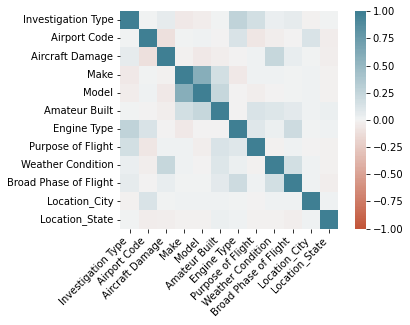

In [25]:
corr = encoded_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Scaling numerical data for PCA

In [26]:
from sklearn.preprocessing import StandardScaler
def data_scaling(dataframe,inverse=False):
    scaler=StandardScaler()
    
    if inverse == False:
        return scaler.fit_transform(dataframe)
    else:
        scaler.fit(dataframe)
        return scaler.inverse_transform(dataframe)

In [27]:
df_numerical_scaled = data_scaling(df_numerical)

In [28]:
df_numerical_scaled

array([[ 0.48124028, -0.18707092, -0.14973867, ...,  1.77131139,
        -0.87397776,  1.87692668],
       [ 0.08626243, -0.18707092, -0.14973867, ...,  1.77131139,
        -1.1003877 ,  1.87692668],
       [-0.1112265 , -0.18707092, -0.14973867, ...,  1.77131139,
        -1.32679763,  1.87692668],
       ...,
       [ 0.48124028, -0.18707092, -0.14973867, ...,  0.46461821,
         1.61653153, -2.3229255 ],
       [ 0.67872921, -0.18707092, -0.14973867, ...,  0.13794492,
         0.37127688, -3.61518771],
       [ 0.28375135, -0.18707092, -0.14973867, ...,  1.1179648 ,
         0.93730172, -5.12282696]])

### Merging label encoded and scaled data

In [31]:
merged_df = pd.concat([encoded_df,pd.DataFrame(df_numerical_scaled, columns=df_numerical_cols)], axis=1)

In [32]:
merged_df.head()

,Investigation Type,Airport Code,Aircraft Damage,Make,Model,Amateur Built,Engine Type,Purpose of Flight,Weather Condition,Broad Phase of Flight,Location_City,Location_State,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Day,Year
0,0,3658,2,1072,805,0,2,17,0,12,7864,86,0.481240,-0.187071,-0.149739,-0.180217,1.771311,-0.873978,1.876927
1,0,8071,0,6039,6356,0,11,18,3,12,15784,86,0.086262,-0.187071,-0.149739,-0.180217,1.771311,-1.100388,1.876927
2,0,9199,3,547,1654,2,12,22,3,12,15977,2,-0.111226,-0.187071,-0.149739,-0.180217,1.771311,-1.326798,1.876927
3,0,9199,3,147,8032,2,12,22,3,12,7318,183,-0.111226,-0.187071,-0.149739,-0.180217,1.771311,-1.440003,1.876927
4,0,2175,2,4052,7713,1,12,17,3,12,16936,242,-0.111226,-0.187071,0.278466,-0.180217,1.771311,-1.553208,1.876927


### Applying PCA on merged data

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(merged_df[['Aircraft Damage', 'Engine Type','Purpose of Flight', 'Weather Condition']])
principal_comp

array([[-1.8855868 , -1.55609268],
       [-3.54596629,  7.36482868],
       [-7.61482296,  8.0597064 ],
       ...,
       [-1.88201664, -1.55367613],
       [-1.88020733, -1.54751599],
       [-1.88020733, -1.54751599]])

In [61]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.885587,-1.556093
1,-3.545966,7.364829
2,-7.614823,8.059706
3,-7.614823,8.059706
4,-2.627019,8.434272


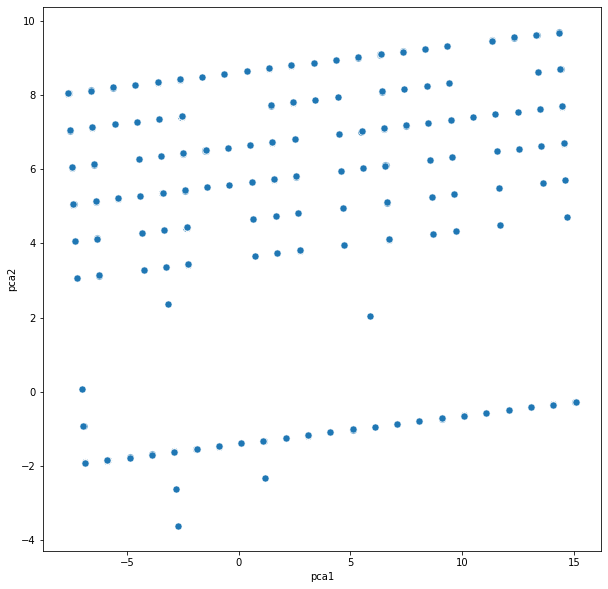

In [62]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", data = pca_df, s=50, cmap='viridis')
plt.show()

### Applying Kmeans

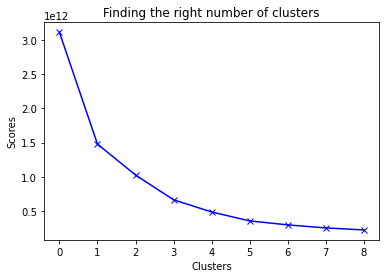

In [37]:
from sklearn.cluster import KMeans

# Obtain optimal number of clusters
scores_1 = []

range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_df)
    scores_1.append(kmeans.inertia_) 
    
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [38]:
scores_1

[3108552789601.4463,
 1478320271422.8918,
 1026920734836.2039,
 665933015194.5864,
 488199279808.4547,
 358136393520.90704,
 300078469177.3802,
 255816433753.9357,
 226603716738.578]

### As we can see, scores are incorrect when pca df is applied for k means

In [39]:
kmeans = KMeans(2)
labels = kmeans.fit_predict(pca_df)
u_labels = np.unique(labels)

In [41]:
kmeans.cluster_centers_

array([[-4538.12146449,    26.26287605],
       [ 4826.51180459,   -27.9318397 ]])

In [42]:
kmeans.score(pca_df)

-1478316655158.774

In [43]:
pca_df['cluster'] = labels
pca_df

,pca1,pca2,cluster
0,-1500.186663,-3462.444004,0
1,6889.181346,3566.345964,1
2,7096.019407,-2811.259929,1
3,-1452.493826,3089.660676,0
4,7495.128400,3850.189570,1
...,...,...,...
74421,-5564.811742,-2796.656636,0
74422,-3950.881870,-2325.023736,0
74423,6718.354836,-3783.197736,1
74424,-7276.976668,4321.295352,0


In [44]:
kmeans.cluster_centers_

array([[-4538.12146449,    26.26287605],
       [ 4826.51180459,   -27.9318397 ]])

In [46]:
pd.crosstab(index=df_cluster['cluster'],columns='count')

col_0,count
cluster,
0,38330
1,36096


### Algorithms like FAMD and MCA are used for dimensionality reduction in categorical data

In [ ]:
#pip install git+https://github.com/Cauchemare/Light_FAMD.git


In [ ]:
from light_famd import FAMD

In [ ]:
famd = FAMD(n_components=2)
famd.fit(df)

In [ ]:
FAMD(check_input=True, copy=False, engine='auto', n_components=2, n_iter=2,
     random_state=None)

In [ ]:
print(famd.explained_variance_)

In [ ]:
print(famd.explained_variance_ratio_)

In [46]:
print(famd.column_correlation(df))

                               0         1
Total Fatal Injuries   -0.171577  0.150869
Total Serious Injuries -0.074575  0.080094
Total Minor Injuries   -0.050200  0.024485
Total Uninjured        -0.309712  0.064856
Month                        NaN  0.020441
...                          ...       ...
Location_State_ TX      0.031596 -0.011789
Location_State_ UT      0.020093       NaN
Location_State_ VA           NaN -0.016258
Location_State_ WA      0.037068       NaN
Location_State_ WI      0.018294 -0.024345

[112 rows x 2 columns]


In [41]:
df_categorical_col = [col for col in df.columns if df[col].dtype == object]

In [47]:
df_categorical = df[df_categorical_col]

In [50]:
print(famd.transform(df)) 

[[1009.84530802  -40.84241101]
 [ 790.23204356  334.42028831]
 [ 617.50912615  680.5138643 ]
 ...
 [1299.63240556  710.24727213]
 [1285.02755987  627.07389284]
 [1280.83808897  719.84627281]]


In [52]:
print(famd.fit_transform(df))

MCA PROCESS ELIMINATED 102549  COLUMNS SINCE THEIR MISS_RATES >= 99%
[[1012.41876825  -43.88298462]
 [ 792.24573035  326.29023588]
 [ 619.08186214  679.15174255]
 ...
 [1302.9441693   709.84875427]
 [1288.30232516  630.21490279]
 [1284.10180863  720.97711709]]


In [ ]:
#famd = prince.FAMD().fit(df)
#PC_test=famd.transform(X_test)

In [53]:
pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=5997 sha256=bd6419b84837ca8e3553db62ef06be47d20e7162c5cd08204924d3aa7b93c279
  Stored in directory: /Users/ratikabhuwalka/Library/Caches/pip/wheels/12/f3/02/f8fed0e1bff285c7b574642586e238edf7cb01401e528a5f70
Successfully built mca
Note: you may need to restart the kernel to use updated packages.


In [71]:
import mca


In [68]:
cat_columns = ['Investigation Type', 'Aircraft Damage', 'Amateur Built', 
      'Engine Type', 'Purpose of Flight', 'Weather Condition', 'Broad Phase of Flight', 'Report Status']
df_cat_dummy = pd.get_dummies(df, columns=cat_columns).iloc[:, 19:]

df_cat = df[cat_columns]

In [69]:
df_cat_dummy

,Investigation Type_Accident,Investigation Type_Incident,Aircraft Damage_Destroyed,Aircraft Damage_Minor,Aircraft Damage_Substantial,Amateur Built_No,Amateur Built_Yes,"Engine Type_REC, TJ, REC, TJ","Engine Type_REC, TJ, TJ",Engine Type_Reciprocating,"Engine Type_TF, TJ","Engine Type_TF, TJ, TJ","Engine Type_TJ, REC, REC, TJ","Engine Type_TP, REC",Engine Type_Turbo Fan,Engine Type_Turbo Jet,Engine Type_Turbo Prop,Engine Type_Turbo Shaft,Engine Type_Unknown,Purpose of Flight_Aerial Application,Purpose of Flight_Aerial Observation,Purpose of Flight_Air Drop,Purpose of Flight_Air Race/Show,Purpose of Flight_Banner Tow,Purpose of Flight_Business,Purpose of Flight_Executive/Corporate,Purpose of Flight_External Load,Purpose of Flight_Ferry,Purpose of Flight_Fire Fighting,Purpose of Flight_Flight Test,Purpose of Flight_Glider Tow,Purpose of Flight_Instructional,Purpose of Flight_Other Work Use,Purpose of Flight_PUBF,Purpose of Flight_PUBL,Purpose of Flight_PUBS,Purpose of Flight_Personal,Purpose of Flight_Positioning,Purpose of Flight_Public Use,Purpose of Flight_Skydiving,Purpose of Flight_Unknown,Weather Condition_IMC,Weather Condition_UNK,Weather Condition_VMC,Broad Phase of Flight_APPROACH,Broad Phase of Flight_CLIMB,Broad Phase of Flight_CRUISE,Broad Phase of Flight_DESCENT,Broad Phase of Flight_GO-AROUND,Broad Phase of Flight_LANDING,Broad Phase of Flight_MANEUVERING,Broad Phase of Flight_OTHER,Broad Phase of Flight_STANDING,Broad Phase of Flight_TAKEOFF,Broad Phase of Flight_TAXI,Broad Phase of Flight_UNKNOWN,Report Status_Factual,Report Status_Foreign,Report Status_Preliminary,Report Status_Probable Cause
0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74421,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
74422,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
74423,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
74424,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
mca_ben = mca.MCA(df_cat_dummy, ncols=len(cat_columns))
